# Linear Regression from scratch

Linear Regression is a method used to define a relationship between a dependent variable (Y) and independent variable (X). Which is simply written as :                           

### y = m*x + b

Here y is the dependent variable, m is the slope or coefficient, b being the bias coefficient and x being the independent variable. The goal with Linear regression is to draw the line of best fit between x and y which estimates the relationship between x and y.

The catch here is that we don't really know the optimal value of m and b. And that is what the entire "learning" part of the Linear Regression algorithm is all about. There are basically two popular ways we'll be implementing here by which we can calculate the coefficients for the given equation.

One is the Ordinary Least Mean Square Method approach and the Gradient Descent approach.

## Ordinary Least Mean Square

In Linear Regression that line is best fit that passes through most of the scatter points and also reduces error which is the distance from the actual point to the line itself (predicted point). And the total error of the linear model is the sum of the error of each point. i.e. , 
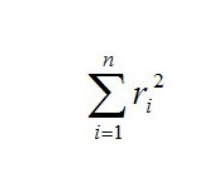


Im order to minimize the coefficients come out to be (m= b1 and b = b0)
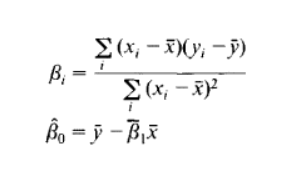

This is the Ordinary Least Square method which we will now implement in python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets ## imports datasets from scikit-learn



In [2]:
data = datasets.load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)


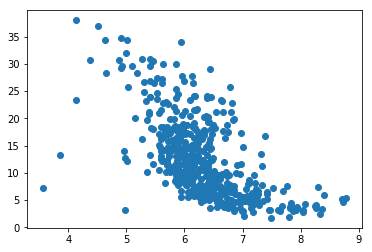

In [3]:
#initializing the inputs and outputs
X= df['RM']
Y = df['LSTAT']
plt.scatter(X,Y)
plt.show()

In [4]:
# mean of our inputs and outputs
x_mean = np.mean(X)
y_mean = np.mean(Y)

#Calculating the coefficients m and b

#total number of values
n = len(X)

# using the formula to calculate the m and b
numerator = 0
denominator = 0
for i in range(n):
    numerator += (X[i] - x_mean) * (Y[i] - y_mean)
    denominator += (X[i] - x_mean) ** 2
    
m = numerator / denominator
b = y_mean - (m * x_mean)
#printing the coefficient
print(m,b)

-6.238451006569765 51.85944696080443


m = -6.238, b = 51.85

Plotting values

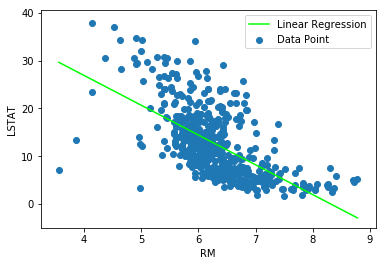

In [5]:
#plotting values 
x_max = np.max(X)
x_min = np.min(X)

#calculating line values of x and y

x = np.linspace(x_min, x_max, 1000)
y = b + m * x

#plotting line 
plt.plot(x, y, color='#00ff00', label='Linear Regression')

#plot the data point
plt.scatter(X, Y, label='Data Point')

# x-axis label
plt.xlabel('RM')

#y-axis label
plt.ylabel('LSTAT')
plt.legend()
plt.show()

In [6]:
rmse = 0
for i in range(n):
    y_pred = b + m * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/n)
print(rmse)

5.63197420351179


## Gradient Descent Method

The basics of Gradient Descent was discussed here (https://github.com/thechange/Classic-ML-Algorithms/blob/master/Gradient%20Descent.ipynb) where we had implemented Gradient Descent from scratch. Here the function on which we'll be appying the derivative will be the cost function which is  

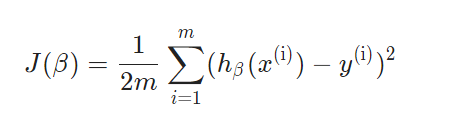

Not to be confused, here h(x) represents the predicted value of y i.e y_pred and y is the actual value, i.e y_actual

To find the values of m and b (we'll be using b0 to represent b and b1 for m), we iteratively update their values according to gradient descent algorithm

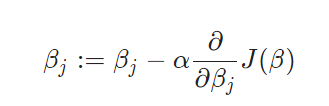

After finding the derivative of the cost function, we achieve the following equation
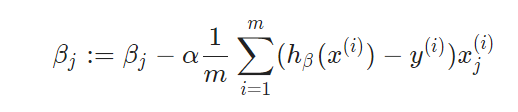

We iteratively change values of b according to above equation. This particular method is called Batch Gradient Descent. Let's try to implement this in python

In [7]:
#initializing parameters

X0 = np.ones(n)
X1 = df['RM'].values
X = np.c_[X0, X1]

print(X.shape)

Y= np.array(df['LSTAT'].values)

B = np.random.rand(2)

print(B.shape)

alpha = 0.001

(506, 2)
(2,)


In [8]:
#defining the cost function

def cost(X,B,Y):
    n=len(Y)
    h = np.dot(X,B)
    loss = h-Y
    return np.dot(loss.T,loss)/(2*n)

In [9]:
inital_cost = cost(X, B, Y)
print(inital_cost)

72.26009898093768


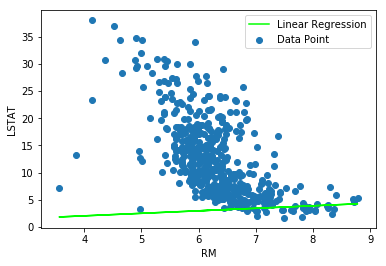

In [10]:
#plotting values 
x_max = np.max(X1)
x_min = np.min(X1)

#calculating line values of x and y

x = np.linspace(x_min, x_max, 506)
y = X.dot(B)

#plotting line 
plt.plot(X1, y, color='#00ff00', label='Linear Regression')

#plot the data point
plt.scatter(X1, Y, label='Data Point')

# x-axis label
plt.xlabel('RM')

#y-axis label
plt.ylabel('LSTAT')
plt.legend()
plt.show()

In [11]:
#Reducing the cost using Linear Regression
def gradient_descent(X,Y,B,alpha,itera):
    cost_history = []
    iterations = []
    n = len(Y)
    for i in range(itera):
        h = np.dot(X,B)
        loss = h-Y
        gradient = np.dot(X.T,loss)/n
        B = B - (alpha * gradient)
        cost_i = cost(X,B,Y)
        cost_history.append(cost_i)
        iterations.append(i)
    return B, cost_history, iterations

-6.238402508493568 51.85913845881844


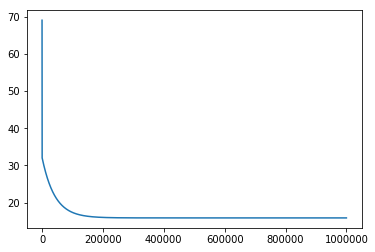

In [14]:
newB, costh, iterations = gradient_descent(X, Y, B, alpha, 1000000)
m = newB[1]
b = newB[0]
print(m,b)
plt.plot(costh)

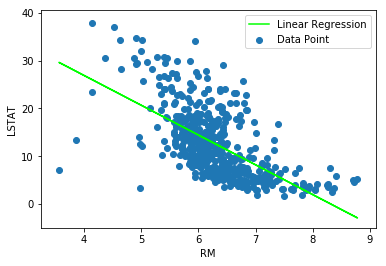

In [16]:
#plotting values 
x_max = np.max(X1)
x_min = np.min(X1)

#calculating line values of x and y

x = np.linspace(x_min, x_max, 506)
y = m*X1 + b

#plotting line 
plt.plot(X1, y, color='#00ff00', label='Linear Regression')

#plot the data point
plt.scatter(X1, Y, label='Data Point')

# x-axis label
plt.xlabel('RM')

#y-axis label
plt.ylabel('LSTAT')
plt.legend()
plt.show()

In [17]:
rmse = 0
for i in range(n):
    y_pred = b + m * X1[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/n)
print(rmse)

5.631974203615892


In [92]:
from sklearn.linear_model import LinearRegression

X = np.array([X1]).T
Y = np.array(df['LSTAT'])

# Model Intialization
reg = LinearRegression()
# Data Fitting
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)

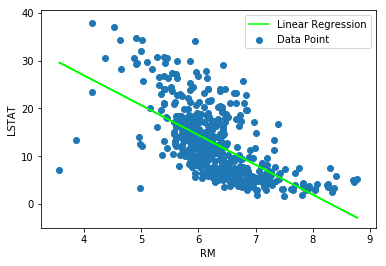

In [16]:
#plotting values 
x_max = np.max(X)
x_min = np.min(X)

#calculating line values of x and y

x = np.linspace(x_min, x_max, 506)
y = Y_pred

#plotting line 
plt.plot(X, y, color='#00ff00', label='Linear Regression')

#plot the data point
plt.scatter(X, Y, label='Data Point')

# x-axis label
plt.xlabel('RM')

#y-axis label
plt.ylabel('LSTAT')
plt.legend()
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(Y, Y_pred))
r2 = reg.score(X, Y)

print(rmse)
print(r2)

5.63197420351179
0.3767605946116111


We observe that the rmse value is same for both the approaches and also matches the one obtained using scikit learn approach. Hence the values of coefficients obtained are verified to be optimal